In [45]:
#---------------------------imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_selection import SelectKBest

In [46]:
#---------------------------read data
Data = pd.read_csv("fetal_health.csv")
Features = Data.columns
Data.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


## 📝We work on fetal health classification dataset has 3 classes: Normal, Suspect and Pathological.But we will label the two classes Suspect and pathological as abnormal.

In [47]:
Data[Features[-1]].replace(3,2, inplace=True)
Data.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,2.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,2.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,2.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,2.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,2.0


In [48]:
#----------check if data have null , NaN and Zeros value
print("check if there null value :\n",Data.isnull().sum())
print("check if there NAN value :\n",Data.isna().sum())
print("check if there Zeros value :\n",Data[Data == 0].count())


check if there null value :
 baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_m

## 📝As Data have alot of zero values this will lead to remove some feature as most all value are zeros


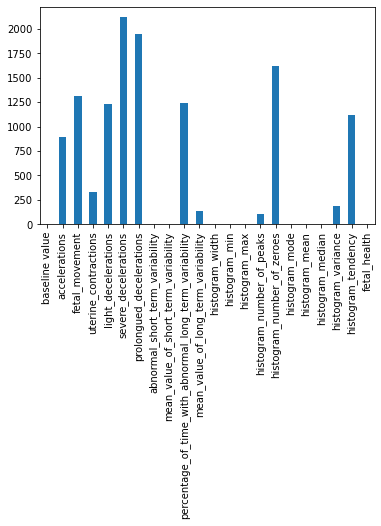

In [49]:
Data[Data == 0].count().plot.bar()

In [50]:
#----------------- dropped feature name 
Drop_features =[Features[5],Features[6],Features[15]]
Drop_features

['severe_decelerations',
 'prolongued_decelerations',
 'histogram_number_of_zeroes']

In [51]:
Data.drop(Drop_features,inplace = True, axis = 'columns')
Data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,152.0,147.0,151.0,4.0,1.0,2.0


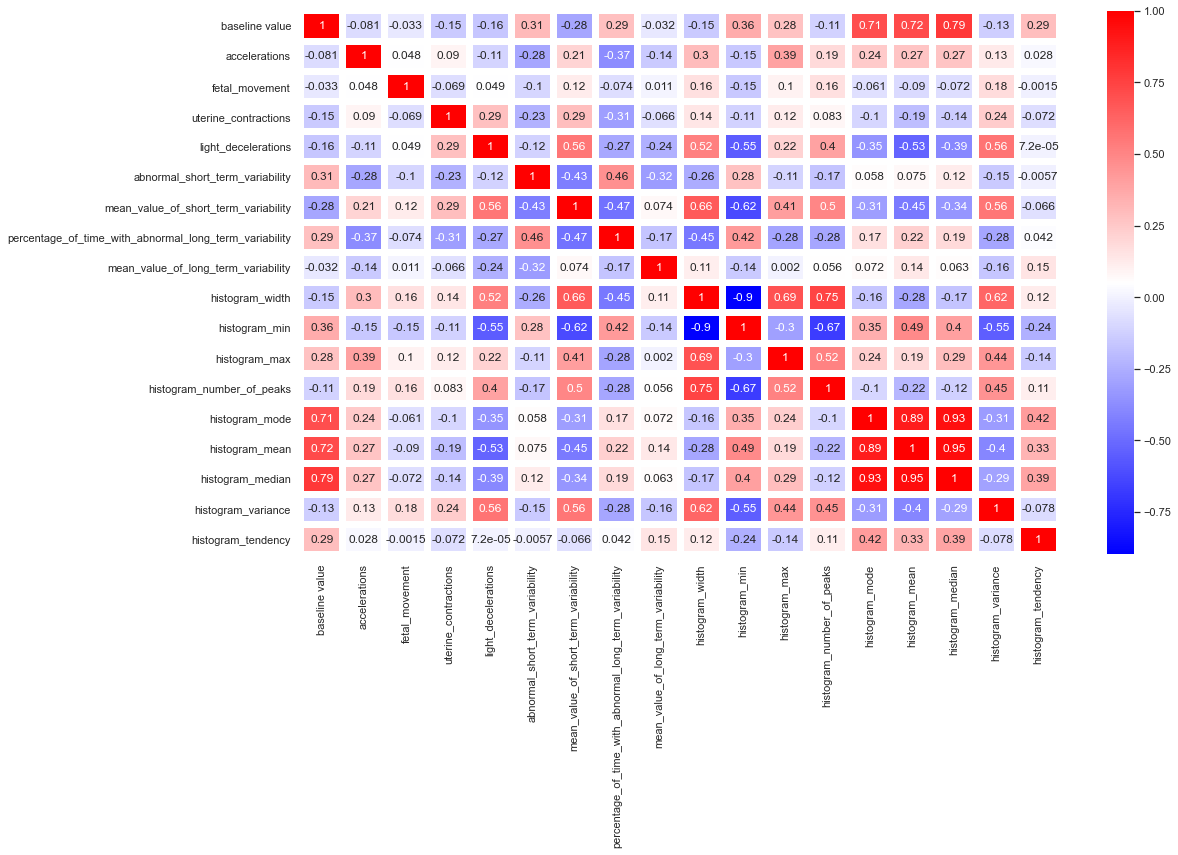

In [52]:
corr =Data.loc[:,Data.columns != 'fetal_health'].corr()
# the heat map of the corrlations Better visualization
sns.set(rc={'figure.figsize': (17, 10)})
dataplot = sns.heatmap(corr, annot=True, cmap="bwr", linewidths=6)

In [53]:
#-------------- check number of records for each class
fetalcategory = Data['fetal_health'].value_counts()
fetalcategory

1.0    1655
2.0     471
Name: fetal_health, dtype: int64

## 📝Can see clearly classes unbalance and this hamper our model accuracy

<BarContainer object of 2 artists>

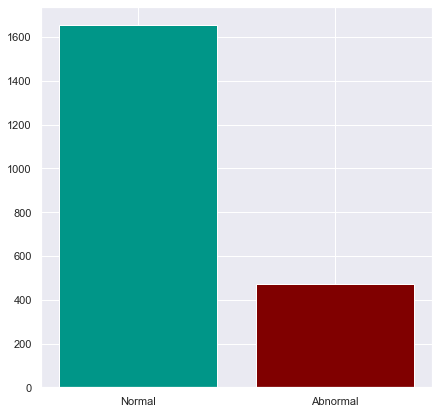

In [54]:
x = np.array(["Normal", "Abnormal"])
y = np.array([fetalcategory[1], fetalcategory[2]])
plt.figure(figsize=(7,7))  
plt.bar(x,y, color=["#009688","#800000"])

<BarContainer object of 2 artists>

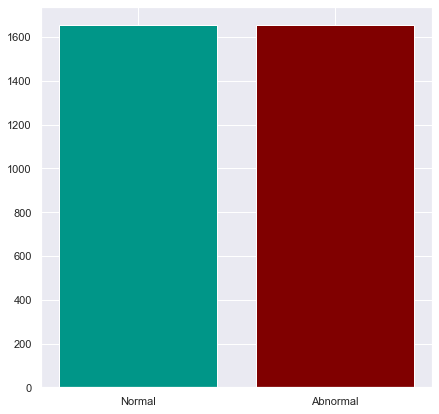

In [55]:
#-------------apply oversampling to balance data -------------
oversample = SMOTE()
Data_balanced_X, Data_balanced_y = oversample.fit_resample(Data.loc[:,Data.columns != 'fetal_health'], Data['fetal_health'])
fetalcategory = Data_balanced_y.value_counts()
y = np.array(fetalcategory[1], fetalcategory[2])
plt.figure(figsize=(7,7))  
plt.bar(x,y, color=["#009688","#800000"])


## 📝Show most feature contribution

In [56]:
fit_feature = SelectKBest()
fit_feature.fit(Data_balanced_X[Data_balanced_X.columns],Data_balanced_y)
score_col = pd.DataFrame(fit_feature.scores_, columns=['score_value'])
name_col = pd.DataFrame(Data_balanced_X.columns,columns=['feature_name'])
top_feature = pd.concat([name_col, score_col], axis=1).nlargest( 31,'score_value')
top_feature['score_value']=top_feature['score_value']/top_feature['score_value'].sum()

top_feature

,feature_name,score_value
5,abnormal_short_term_variability,0.316138
1,accelerations,0.255790
7,percentage_of_time_with_abnormal_long_term_var...,0.170628
3,uterine_contractions,0.065072
0,baseline value,0.061146
6,mean_value_of_short_term_variability,0.037157
8,mean_value_of_long_term_variability,0.027727
10,histogram_min,0.019639
9,histogram_width,0.016080
2,fetal_movement,0.005590


Text(0.5, 1.0, 'feature score value')

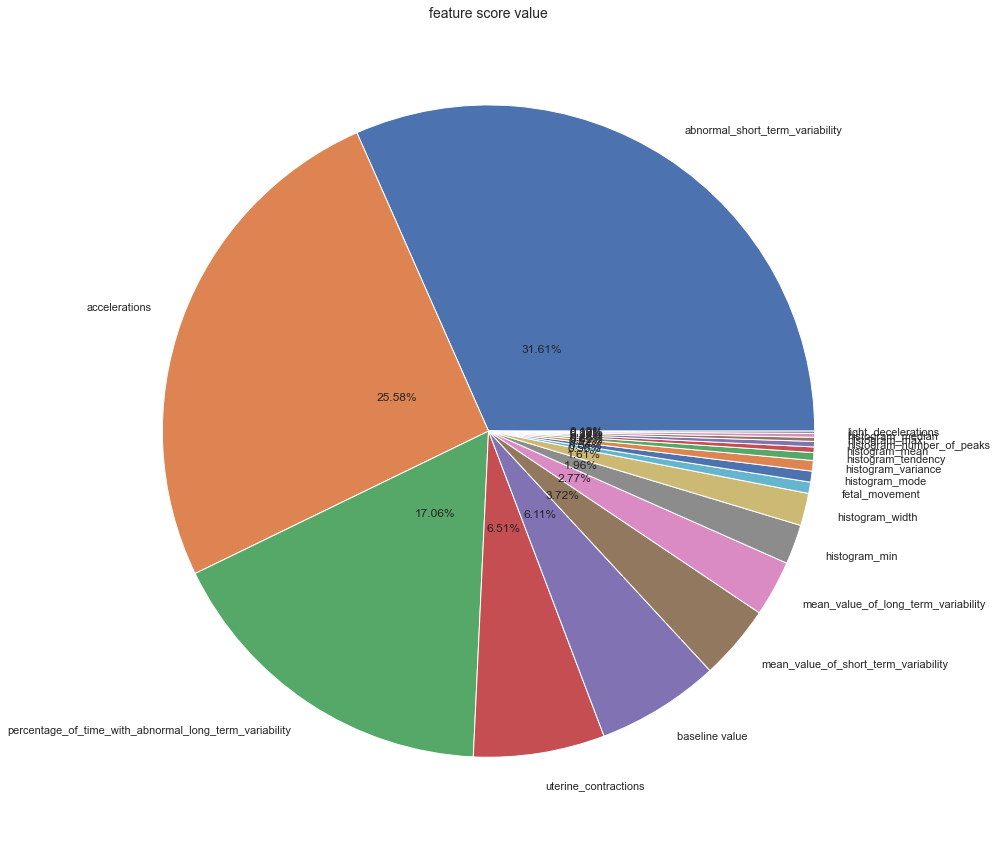

In [57]:
best_feature_name=np.array(top_feature.iloc[:18,0])
best_feature_name
pie, ax = plt.subplots(figsize=[15,15])
plt.pie(x=top_feature.iloc[:18,1], autopct="%.2f%%",labels=top_feature.iloc[:18,0], pctdistance=.3)
plt.title("feature score value", fontsize=14)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(Data_balanced_X, Data_balanced_y, test_size=0.30, random_state=1, stratify=Data_balanced_y)
print(Counter(y_train))
print(Counter(y_test))

Counter({1.0: 1159, 2.0: 1158})
Counter({2.0: 497, 1.0: 496})


## <mark>SVM</mark><br>
## 📝Choose best parameters for 

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
SVC_Model = SVC(kernel='rbf')
parameters = {'kernel' : ('linear','poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10, 20 ]}
GS = GridSearchCV(SVC_Model , parameters)
GS.fit(X_train,y_train)

print(GS.best_params_)

{'C': 20, 'kernel': 'rbf'}


In [60]:
from sklearn.metrics import accuracy_score
SVC_Model =SVC(C= 20 , kernel='rbf')
SVC_Model.fit(X_train,y_train)

train_predictions = SVC_Model.predict(X_train)
training_acc =accuracy_score(y_train,train_predictions)
print("training_accuracy %: " ,round(training_acc*100 , 2) )

test_predictions = SVC_Model.predict(X_test)
testing_acc=accuracy_score(y_test,test_predictions)
print("testing_accuracy %: " , round(testing_acc*100 , 2))

training_accuracy %:  89.21
testing_accuracy %:  87.92


In [61]:
Data_balanced=Data_balanced_X
Data_balanced['fetal_health'] = Data_balanced_y
Data_balanced
Data_min_max_scaled = Data_balanced.copy()

# apply normalization techniques
for column in Data_min_max_scaled.columns[:-1]:
    Data_min_max_scaled[column] = (Data_min_max_scaled[column] - Data_min_max_scaled[column].min()) / (Data_min_max_scaled[column].max() - Data_min_max_scaled[column].min())    

# view normalized data
Data_min_max_scaled


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,0.259259,0.000000,0.000000,0.000000,0.000000,0.813333,0.044118,0.472527,0.047337,0.344633,0.110092,0.034483,0.111111,0.472441,0.587156,0.403670,0.271375,1.0,2.0
1,0.481481,0.315789,0.000000,0.400000,0.200000,0.066667,0.279412,0.000000,0.205128,0.717514,0.165138,0.655172,0.333333,0.637795,0.577982,0.577982,0.044610,0.5,1.0
2,0.500000,0.157895,0.000000,0.533333,0.200000,0.053333,0.279412,0.000000,0.264300,0.717514,0.165138,0.655172,0.277778,0.637795,0.568807,0.559633,0.048327,0.5,1.0
3,0.518519,0.157895,0.000000,0.533333,0.200000,0.053333,0.323529,0.000000,0.453649,0.644068,0.027523,0.413793,0.611111,0.606299,0.559633,0.550459,0.048327,1.0,1.0
4,0.481481,0.368421,0.000000,0.533333,0.000000,0.053333,0.323529,0.000000,0.392505,0.644068,0.027523,0.413793,0.500000,0.606299,0.577982,0.559633,0.040892,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3305,0.460481,0.090071,0.000000,0.742270,0.674232,0.653333,0.290175,0.000000,0.000000,0.708719,0.005296,0.491557,0.309850,0.489406,0.224061,0.314198,0.364465,0.5,2.0
3306,0.512957,0.000000,0.011637,0.046647,0.000000,0.816677,0.005145,0.973088,0.061339,0.026552,0.746329,0.146979,0.055556,0.583067,0.566052,0.538529,0.000000,0.5,2.0
3307,0.444559,0.000000,0.011666,0.106998,0.000000,0.831851,0.005901,0.338421,0.124625,0.067762,0.713784,0.179278,0.088820,0.587441,0.568807,0.539472,0.004452,0.5,2.0
3308,0.709540,0.000000,0.000000,0.087679,0.000000,0.773333,0.014706,0.473425,0.104536,0.060212,0.810231,0.258386,0.055556,0.677165,0.663442,0.639060,0.000000,0.5,2.0


## 📝Svm get better accuracy at normalized data

In [62]:

from sklearn.svm import SVC
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(Data_min_max_scaled.loc[:,Data_min_max_scaled.columns != 'fetal_health'] , Data_min_max_scaled['fetal_health'], test_size=0.30, random_state=1, stratify=Data_min_max_scaled['fetal_health'])
from sklearn.metrics import accuracy_score
SVC_Model =SVC(C= 20 , kernel='rbf')
SVC_Model.fit(X_train_norm,y_train_norm)

train_predictions = SVC_Model.predict(X_train_norm)
SvmTraining =  round(accuracy_score(y_train_norm,train_predictions)*100 , 2)
print("training_accuracy : " , SvmTraining )

test_predictions = SVC_Model.predict(X_test_norm)
SvmTesting= round(accuracy_score(y_test_norm,test_predictions)*100 , 2)
print("testing_accuracy : " , SvmTesting )

training_accuracy :  96.63
testing_accuracy :  96.37


### <mark> Decision Tree </mark><br>

In [63]:
##----------tree not effected by normalization as it is not distance based algorithm ,so data before normalization
from sklearn import tree
tree_model =tree.DecisionTreeClassifier(criterion='entropy',max_depth=7)
tree_model.fit(X_train,y_train)

DecisionTreeTraining =  round(tree_model.score(X_train,y_train)*100,2)
DecisionTreeTesting =  round(tree_model.score(X_test,y_test)*100,2)

print("training_accuracy : " , DecisionTreeTraining)
print("testing_accuracy : " , DecisionTreeTesting)



training_accuracy :  95.86
testing_accuracy :  92.45


### <mark> K-nearest-neighbour </mark><br>

In [64]:
xForKnn=Data.loc[:,Data.columns != 'fetal_health']
yForKnn=Data['fetal_health']

XKnnTrain, XKnnTest, YKnnTrain, YKnnTest =train_test_split(xForKnn, yForKnn, test_size=0.30, random_state=1, stratify=yForKnn)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
Classifier= KNeighborsClassifier(n_neighbors=5)
Classifier.fit(XKnnTrain,YKnnTrain)

KNeighborsClassifier()

## 📝Before Standardising

In [66]:
from sklearn.metrics import classification_report
YPredictTest=Classifier.predict(XKnnTest)
YPredictTrain=Classifier.predict(XKnnTrain)
trainingAcc =accuracy_score(YKnnTrain,YPredictTrain)
testingAcc=accuracy_score(YKnnTest,YPredictTest)

#print(classification_report(YKnnTest,YPredictTest))
print("training_accuracy % : " ,round(trainingAcc*100,2))
print("testing_accuracy % : " ,round(testingAcc*100,2))

training_accuracy % :  92.67
testing_accuracy % :  91.38


## 📝 After Standardising accurecy is better

In [67]:
from sklearn.preprocessing import StandardScaler
scalerKnn=StandardScaler()
scalerKnn.fit(XKnnTrain)
XKnnTrain=scalerKnn.transform(XKnnTrain)
XKnnTest=scalerKnn.transform(XKnnTest)

In [68]:
from sklearn.metrics import classification_report
Classifier.fit(XKnnTrain,YKnnTrain)
YPredictTest=Classifier.predict(XKnnTest)
YPredictTrain=Classifier.predict(XKnnTrain)
trainingAcc =accuracy_score(YKnnTrain,YPredictTrain)
testingAcc=accuracy_score(YKnnTest,YPredictTest)

#print(classification_report(YKnnTest,YPredictTest))
print("training_accuracy % : " ,round(trainingAcc*100,2))
print("testing_accuracy % : " ,round(testingAcc*100,2))

training_accuracy % :  94.09
testing_accuracy % :  93.73


##  📝 Now Trying diffrent value for  n_neighbors 

In [69]:
arrayOfScores = []
for i in range (10):
    
    Classifier= KNeighborsClassifier(n_neighbors=i+1)
    Classifier.fit(XKnnTrain,YKnnTrain)
    scalerKnn.fit(XKnnTrain)
    XKnnTrain=scalerKnn.transform(XKnnTrain)
    XKnnTest=scalerKnn.transform(XKnnTest)
    Classifier.fit(XKnnTrain,YKnnTrain)
    YPredictTest=Classifier.predict(XKnnTest)
    YPredictTrain=Classifier.predict(XKnnTrain)
    trainingAcc =accuracy_score(YKnnTrain,YPredictTrain)
    testingAcc=accuracy_score(YKnnTest,YPredictTest)
    arrayOfScores.append(testingAcc)

bestTest=max(arrayOfScores)
bestN=arrayOfScores.index(max(arrayOfScores))+1
print("The best test score is " ,bestTest*100,"%" ,"When n_neighbors=",bestN)

The best test score is  93.73040752351098 % When n_neighbors= 5


##  📝 Final Value for Knn 

In [70]:
Classifier= KNeighborsClassifier(n_neighbors=bestN)
Classifier.fit(XKnnTrain,YKnnTrain)
scalerKnn.fit(XKnnTrain)
XKnnTrain=scalerKnn.transform(XKnnTrain)
XKnnTest=scalerKnn.transform(XKnnTest)
Classifier.fit(XKnnTrain,YKnnTrain)
YPredictTest=Classifier.predict(XKnnTest)
YPredictTrain=Classifier.predict(XKnnTrain)

KnnTraining =round(accuracy_score(YKnnTrain,YPredictTrain)*100,2)
KnnTesting=round(accuracy_score(YKnnTest,YPredictTest)*100,2)

# print(classification_report(YKnnTest,YPredictTest))
print("training_accuracy % : " ,KnnTraining)
print("testing_accuracy % : " ,KnnTesting)



training_accuracy % :  94.09
testing_accuracy % :  93.73


### <mark> Gaussian Naive Bayes </mark><br>

In [71]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

X_before_oversampling=Data.drop(["fetal_health"],axis=1)
y_before_oversampling=Data["fetal_health"]
X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(X_before_oversampling, y_before_oversampling, test_size=0.25, random_state=0)

gnb = GaussianNB()
gnb.fit(X_train_NB, y_train_NB)
NaiveTraining = round(gnb.score(X_train_NB,y_train_NB)*100,2)
NaiveTesting = round(gnb.score(X_test_NB,y_test_NB)*100,2)
print("training_accuracy % :",NaiveTraining)
print("testing_accuracy % :",NaiveTesting)

training_accuracy % : 88.58
testing_accuracy % : 84.96


### <mark> Random Forest</mark><br>

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train_RF, X_test_RF, y_train_RF, y_test_RF = X_train_NB, X_test_NB, y_train_NB, y_test_NB

RF= RandomForestClassifier() #Train With The defalt values
RF.fit(X_train_RF, y_train_RF)

ForestTraining=round(RF.score(X_train_RF,y_train_RF)*100,2)
ForestTesting=round(RF.score(X_test_RF, y_test_RF)*100,2)
print("training_accuracy % :",ForestTraining) # ============ There are overfitting
print("testing_accuracy % :",ForestTesting)

training_accuracy % : 99.87
testing_accuracy % : 94.74


In [74]:
from sklearn.model_selection import GridSearchCV

parameters = { 
    'n_estimators' : [100,150, 200,500,700,900],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'max_depth'    : [4,6,8,12,14,16],
    'criterion'    : ['gini', 'entropy'],
}
#Fitting the trainingset to find parameters with best accuracy
CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv= 5)
CV_rfc.fit(X_train, y_train)

#Getting the outcome of gridsearch
CV_rfc.best_params_

#--------------Best Parameter Values

# {'criterion': 'entropy',
#  'max_depth': 12,
#  'max_features': 'sqrt',
#  'n_estimators': 100,
#  'n_jobs': -1}

### 📝When we applied the best parameters value from grid search, the best max_depth was 12 but this leads to overfitting again.So I tried to get the best values by trial and error and I found that the best max_depth = 7

In [75]:
RF= RandomForestClassifier(criterion='entropy', max_depth=7,max_features='sqrt',n_estimators=100)
RF.fit(X_train_RF, y_train_RF)

ForestTraining=round(RF.score(X_train_RF,y_train_RF)*100,2)
ForestTesting=round(RF.score(X_test_RF, y_test_RF)*100,2)
print("training_accuracy % :",ForestTraining)
print("testing_accuracy % :",ForestTesting)

training_accuracy % : 97.74
testing_accuracy % : 94.74


96.37 93.73 84.96 94.74 92.45


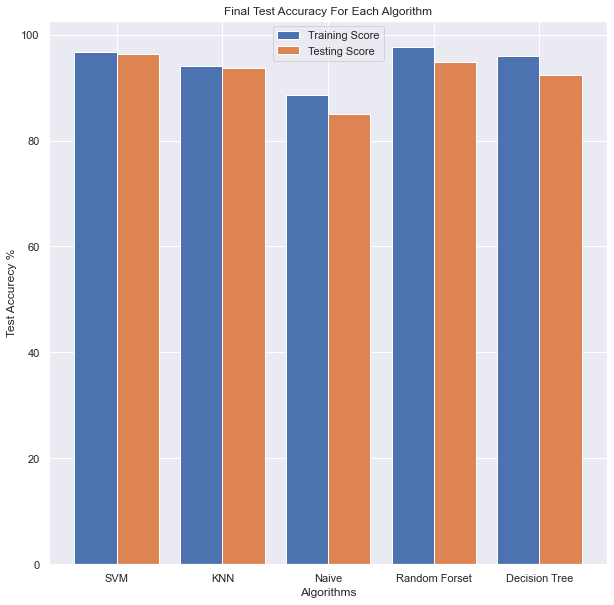

In [76]:
import numpy as np
import matplotlib.pyplot as plt

X = ['SVM','KNN','Naive','Random Forset', 'Decision Tree']
Train = [SvmTraining, KnnTraining, NaiveTraining, ForestTraining , DecisionTreeTraining]
Test = [SvmTesting, KnnTesting, NaiveTesting, ForestTesting, DecisionTreeTesting]


print(SvmTesting, KnnTesting, NaiveTesting, ForestTesting,DecisionTreeTesting)

X_axis = np.arange(len(X))
plt.figure(figsize=(10,10)) 

plt.bar(X_axis - 0.2, Train, 0.4, label = 'Training Score')
plt.bar(X_axis + 0.2, Test, 0.4, label = 'Testing Score')

plt.xticks(X_axis, X)
plt.xlabel("Algorithms")
plt.ylabel("Test Accurecy %")
plt.title("Final Test Accuracy For Each Algorithm")
plt.legend()
plt.show()

